# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: Jermaine Presbery

## Directions

The main purpose of this assignment is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [1]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

In [13]:
 # Importing load_irs and train_test_split function
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# making dictionary named iris
iris = load_iris() 

# petal length and width
X = iris.data[:, 2:]
y = iris.target

# Intializing X_train, X_test, y_train, y_test and calling train_test_split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=0)

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [15]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier   

# Creating Decision Tree Classifer Oject 
tree_clf = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train, y_train)


In [17]:
# Importing accuracy_score 
from sklearn.metrics import accuracy_score

# Predicting output for test dataset 
preds = tree_clf.predict(X_test)

# Preparing acc_score to be printed out
acc_score = accuracy_score(y_test, preds)

# Printing out acc_score 
print('Accuracy=%s' % (acc_score))

Accuracy=0.8833333333333333


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[1,2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [52]:
# Importing GridSearchSv 
from sklearn.model_selection import GridSearchCV

# Creation of Dictionary for param_grid with respectabe grids 
param_grid = { 'max_depth': [1,2,3,4,5,8,16,32],
              'max_leaf_nodes': list(range(2, 20, 1)),
              'min_samples_split': [2,3,4,5,8,12,16,20]
              }

# 
dt = DecisionTreeClassifier(random_state=42)

# Creating an object of the GirdSearchCV
grid_search_cv = GridSearchCV(dt, param_grid, verbose=1, cv=3)

# Fitting data to perform the grid search using 3-fold cross validation 
grid_search_cv.fit(X_train, y_train)

# Checking for best parameters
best_mod = grid_search_cv.best_params_

# Priting the best parameters
print("The best parameters are:" , best_mod)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are: {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:    3.3s finished
C:\Users\bigpr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
# Importing Libraries for precision and recall score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Predicting values for test set
y_pred = tree_clf.predict(X_test)

# Calculating the precision, accuracy, and recall scores
prec_score = precision_score(y_test, y_pred, average = 'micro')
acc_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred, average = 'micro')

# Printing out the precision, accuracy, and recall scores
print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.8833333333333333
Precision=0.8833333333333333
Recall=0.8833333333333333


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [75]:
# Importing export_text to visiualize data
from sklearn.tree import export_text
from sklearn import tree

# Creating Decision Tree Classifer Oject 
tree_clf = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train, y_train)

# making dictionary named iris
iris = load_iris() 

# Printing out the best models for each individual category
print('Best max_depth: ', grid_search_cv.best_params_['max_depth'])
print('Best max_leaf_nodes: ', grid_search_cv.best_params_['max_leaf_nodes'])
print('Best min_samples_split: ', grid_search_cv.best_params_['min_samples_split'])

# Visualizing Optimal Decision Tree as text
text_output = export_text(tree_clf)

# Printing out text Visualization
print(text_output)



Best max_depth:  2
Best max_leaf_nodes:  3
Best min_samples_split:  2
|--- feature_0 <= 2.35
|   |--- class: 0
|--- feature_0 >  2.35
|   |--- feature_0 <= 5.05
|   |   |--- feature_1 <= 1.75
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.75
|   |   |   |--- feature_0 <= 4.90
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4.90
|   |   |   |   |--- class: 2
|   |--- feature_0 >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

[Text(558.0, 978.48, 'X[0] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(279.0, 761.0400000000001, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(837.0, 761.0400000000001, 'X[0] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(558.0, 543.6, 'X[1] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(279.0, 326.1600000000001, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(837.0, 326.1600000000001, 'X[0] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(558.0, 108.72000000000003, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(1116.0, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1116.0, 543.6, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

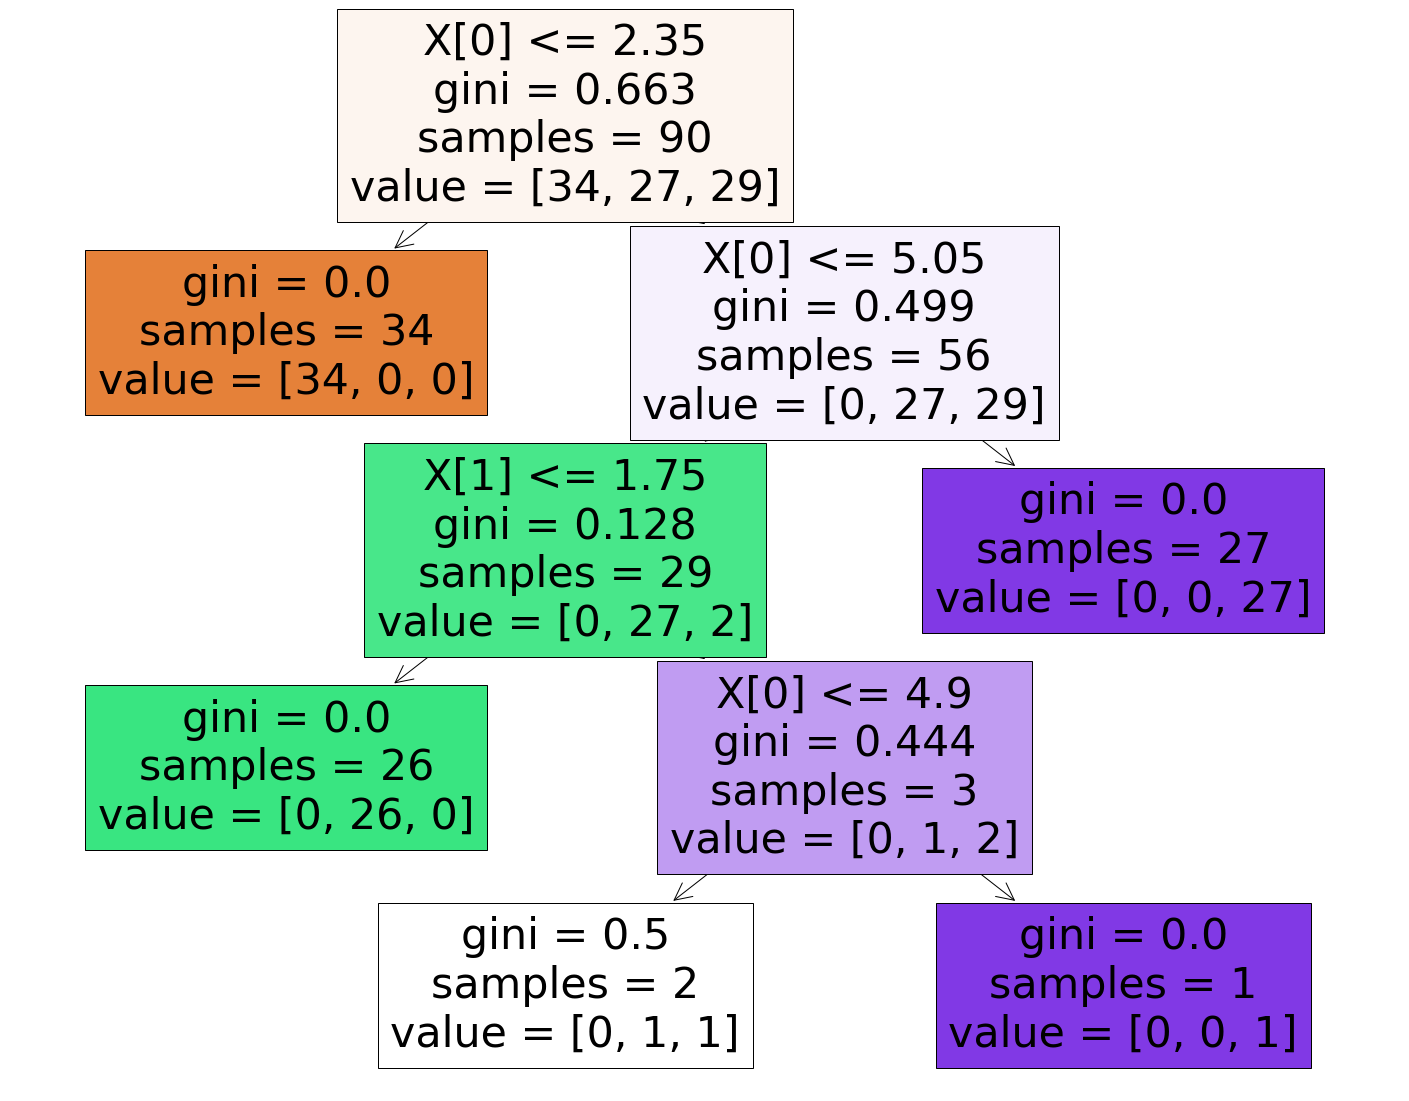

In [77]:
# Importing plt in order to plot image
from matplotlib import pyplot as plt

# Creating figure size
fig = plt.figure(figsize=(25,20))

# Plotting Decision Tree as an image
tree.plot_tree(tree_clf, filled = True)


## Critical Analysis

In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.) 

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

    The main role for the gini score in the Decision tree algorithm is that it measures specfically how the features within a dataset should split into nodes in order to form a tree. Gini score compares too entropy impurity measure is that gini is better compared to entropy because gini is more apprioate for selecting the best features, based on the interval gini has. 
    The CART algorithm determines the feature and threshold value with the use of the gini score criterion, which allows for the CART algo. to search for the best nearby subnodes with the help of the gini 

## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

(Write analysis here.)